# Preparation

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/Users/sarahluym/Desktop/求职/Projects/Github/WhaleDataScienceProject/data/train.csv')
test = pd.read_csv('/Users/sarahluym/Desktop/求职/Projects/Github/WhaleDataScienceProject/data/test.csv')
fullset = pd.concat([train, test], ignore_index=True)

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              892816 non-null  int64  
 1   ps_ind_01       892816 non-null  int64  
 2   ps_ind_02_cat   892816 non-null  int64  
 3   ps_ind_03       892816 non-null  int64  
 4   ps_ind_04_cat   892816 non-null  int64  
 5   ps_ind_05_cat   892816 non-null  int64  
 6   ps_ind_06_bin   892816 non-null  int64  
 7   ps_ind_07_bin   892816 non-null  int64  
 8   ps_ind_08_bin   892816 non-null  int64  
 9   ps_ind_09_bin   892816 non-null  int64  
 10  ps_ind_10_bin   892816 non-null  int64  
 11  ps_ind_11_bin   892816 non-null  int64  
 12  ps_ind_12_bin   892816 non-null  int64  
 13  ps_ind_13_bin   892816 non-null  int64  
 14  ps_ind_14       892816 non-null  int64  
 15  ps_ind_15       892816 non-null  int64  
 16  ps_ind_16_bin   892816 non-null  int64  
 17  ps_ind_17_

# Data Exploration

## Column Exploration

In [37]:
def data_report(train, test, missing_values=-1, cols_ignore_missing=[]):
    df = pd.concat([train, test]).reset_index(drop=True).fillna(np.nan)
    data = []
    for col in df.columns:
        # column role
        if col == 'target':
            role = 'target'
        elif col == 'id':
            role = 'id'
        else:
            role = 'feature'
        
        # column category
        if 'ind' in col:
            cate = 'individual'
        elif 'car' in col:
            cate = 'car'
        elif 'calc' in col:
            cate = 'calculated'
        elif 'reg' in col:
            cate = 'region'
        else:
            cate = 'other'
        
        # level of measurement
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif df[col].dtype == 'int64':
            level = 'ordinal'
        else:
            level = 'continuous'
        
        # data type
        dtype = df[col].dtype
        
        # unique values
        if col == 'id' or df[col].dtype == 'float64':
            uniq = 'Ignore'
        else:
            uniq = df[col].nunique()
        
        # cardinality
        if uniq == 'Ignore':
            cardinality = 'Ignore'
        elif uniq <= 10:
            cardinality = 'Low Cardinality'
        elif uniq <= 30:
            cardinality = 'Medium Cardinality'
        else:
            cardinality = 'High Cardinality'
        
        # missing value
        total_missing = sum(df[col] == missing_values)
        train_missing = sum(train[col] == missing_values)
        if col == 'target':
            test_missing = 'NA'
        else:
            test_missing = sum(test[col] == missing_values)
        
        # missing percent
        total_miss_pct = f'{total_missing}({round(total_missing*100 / len(df), 2)}%)'
        train_miss_pct = f'{train_missing}({round(train_missing*100 / len(train), 2)}%)'
        if col == 'target':
            test_miss_pct = 'NA'
        else:
            test_miss_pct = f'{test_missing}({round(test_missing*100 / len(test), 2)}%)'
        
        # imputation
        if total_missing > df.shape[0]*0.4:
            imputation = 'remove'
        elif total_missing > 0:
            if level == 'binary' or level == 'nominal':
                imputation = 'mode'
            elif level == 'ordinal':
                imputation = ('mode', 'median')
            else:
                imputation = ('mode', 'median', 'mean')
        else:
            imputation = 'No Missing'
        
        col_dict = {
            'colname': col,
            'role': role, 
            'category': cate,
            'level': level,
            'dtype': dtype,
            'unique': uniq,
            'cardinality': cardinality,
            'total_missing': total_missing,
            'train_missing': train_missing,
            'test_missing': test_missing,
            'total_missing_percent': total_miss_pct,
            'train_missing_percent': train_miss_pct,
            'test_missing_percent': test_miss_pct,
            'imputation': imputation
        }
        data.append(col_dict)
        
    meta = pd.DataFrame(data, columns=list(col_dict.keys()))
    meta.set_index('colname', inplace=True)
    
    print('Columns to drop:')
    print(meta[meta['imputation'] == 'remove'].index.to_list())
    
    print('\n Imputation:')
    impute_cols = meta[(meta['imputation'] != 'No Missing') & (meta['imputation'] != 'remove')].index.to_list()
    print(meta[['total_missing', 'total_missing_percent', 'imputation']].loc[impute_cols].sort_values('total_missing'))
    msno.heatmap(df[impute_cols].replace(-1,np.nan))
    
    return meta

Columns to drop:
['ps_car_03_cat', 'ps_car_05_cat']

 Imputation:
               total_missing total_missing_percent            imputation
colname                                                                 
ps_car_12                  1               1(0.0%)  (mode, median, mean)
ps_car_11                  6               6(0.0%)        (mode, median)
ps_car_02_cat             10              10(0.0%)                  mode
ps_ind_04_cat            228            228(0.02%)                  mode
ps_car_01_cat            267            267(0.02%)                  mode
ps_ind_02_cat            523            523(0.04%)                  mode
ps_car_09_cat           1446            1446(0.1%)                  mode
ps_ind_05_cat          14519          14519(0.98%)                  mode
ps_car_07_cat          28820          28820(1.94%)                  mode
ps_car_14             106425         106425(7.15%)  (mode, median, mean)
ps_reg_03             269456        269456(18.11%)  (mode,

,role,category,level,dtype,unique,cardinality,total_missing,train_missing,test_missing,total_missing_percent,train_missing_percent,test_missing_percent,imputation
colname,,,,,,,,,,,,,
id,id,other,nominal,int64,Ignore,Ignore,0,0,0,0(0.0%),0(0.0%),0(0.0%),No Missing
target,target,other,binary,float64,Ignore,Ignore,0,0,NA,0(0.0%),0(0.0%),NA,No Missing
ps_ind_01,feature,individual,ordinal,int64,8,Low Cardinality,0,0,0,0(0.0%),0(0.0%),0(0.0%),No Missing
ps_ind_02_cat,feature,individual,nominal,int64,5,Low Cardinality,523,216,307,523(0.04%),216(0.04%),307(0.03%),mode
ps_ind_03,feature,individual,ordinal,int64,12,Medium Cardinality,0,0,0,0(0.0%),0(0.0%),0(0.0%),No Missing
ps_ind_04_cat,feature,individual,nominal,int64,3,Low Cardinality,228,83,145,228(0.02%),83(0.01%),145(0.02%),mode
ps_ind_05_cat,feature,individual,nominal,int64,8,Low Cardinality,14519,5809,8710,14519(0.98%),5809(0.98%),8710(0.98%),mode
ps_ind_06_bin,feature,individual,binary,int64,2,Low Cardinality,0,0,0,0(0.0%),0(0.0%),0(0.0%),No Missing
ps_ind_07_bin,feature,individual,binary,int64,2,Low Cardinality,0,0,0,0(0.0%),0(0.0%),0(0.0%),No Missing


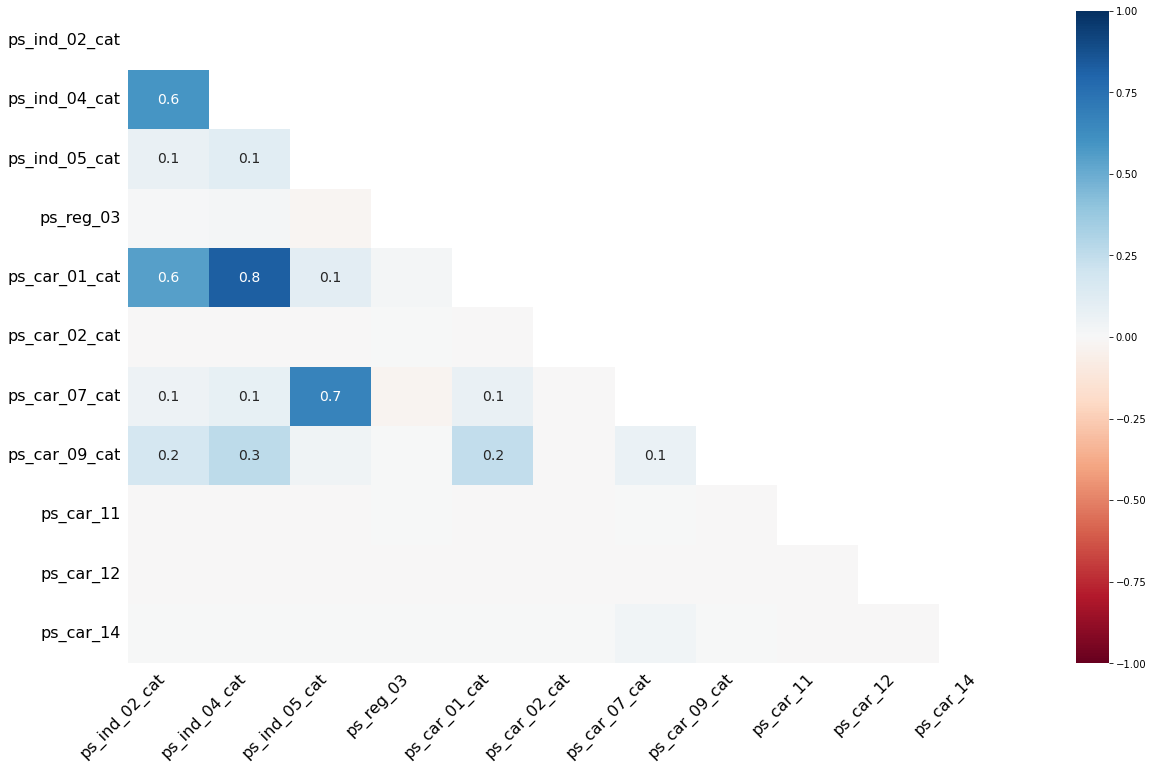

In [38]:
meta_data = data_report(train, test)
meta_data

Neet to fix missing values and drop several columns!

The missing values of columns ps_car_01_cat, ps_ind_04_cat and ps_ind_02_cat have strong positive relationships.  
The missing values of ps_car_07_cat and ps_ind_05_cat also have strong positive relationships.

## Target Exploration

No Claim:  573518
Claim:  21694
Ratio:  26.44 :1


<AxesSubplot:>

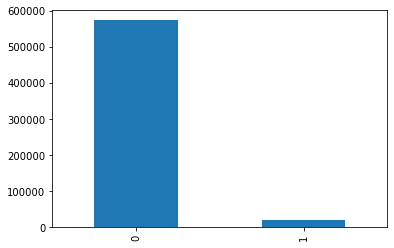

In [24]:
target_cnt = train['target'].value_counts()
print('No Claim: ', target_cnt[0])
print('Claim: ', target_cnt[1])
print('Ratio: ', round(target_cnt[0] / target_cnt[1], 2), ':1')

target_cnt.plot(kind='bar')

Imbalanced data! Need random sampling!

# Data Cleaning

## Fix Missing Values

In [108]:
# Drop columns that have over 40% missing values
cols_to_drop = meta_data[meta_data['imputation'] == 'remove'].index.to_list()
train_temp = train.drop(cols_to_drop, axis=1)
test_temp = test.drop(cols_to_drop, axis=1)
train_temp.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='object')

In [109]:
# Columns that need imputation
impute_cols = meta_data[(meta_data['imputation'] != 'No Missing') & (meta_data['imputation'] != 'remove')].index.to_list()
mul_imp_cols = ['ps_car_01_cat', 'ps_ind_04_cat', 'ps_ind_02_cat', 'ps_car_07_cat', 'ps_ind_05_cat']
uni_imp_cols = list(set(impute_cols).difference(set(mul_imp_cols)))
uni_imp_cols

['ps_car_12',
 'ps_car_09_cat',
 'ps_car_14',
 'ps_car_11',
 'ps_reg_03',
 'ps_car_02_cat']

In [111]:
# Univariate Imputation -- train
mode_imputer = SimpleImputer(missing_values=-1, strategy='most_frequent', add_indicator=True)
imp = mode_imputer.fit_transform(train_temp[uni_imp_cols])
imp
train_temp[uni_imp_cols] = pd.DataFrame(imp).iloc[:, :len(uni_imp_cols)]
train_temp[uni_imp_cols].head()

,ps_car_12,ps_car_09_cat,ps_car_14,ps_car_11,ps_reg_03,ps_car_02_cat
0,0.400000,0.0,0.370810,2.0,0.718070,1.0
1,0.316228,2.0,0.388716,3.0,0.766078,1.0
2,0.316228,2.0,0.347275,1.0,0.633936,1.0
3,0.374166,3.0,0.294958,1.0,0.580948,1.0
4,0.316070,2.0,0.365103,3.0,0.840759,1.0


In [112]:
# Univariate Imputation -- test
imp = mode_imputer.fit_transform(test_temp[uni_imp_cols])

test_temp[uni_imp_cols] = pd.DataFrame(imp).iloc[:, :len(uni_imp_cols)]
test_temp[uni_imp_cols].head()

,ps_car_12,ps_car_09_cat,ps_car_14,ps_car_11,ps_reg_03,ps_car_02_cat
0,0.316228,2.0,0.352136,1.0,0.610328,1.0
1,0.316228,0.0,0.358329,1.0,0.771362,1.0
2,0.400000,2.0,0.398497,3.0,0.916174,1.0
3,0.374166,2.0,0.381445,2.0,0.633936,1.0
4,0.374166,2.0,0.385097,3.0,0.817771,1.0


In [113]:
# Multivariate Imputation -- KNN Imputer -- train
set1 = ['ps_ind_05_cat', 'ps_car_07_cat']
set2 = ['ps_car_01_cat', 'ps_ind_04_cat', 'ps_ind_02_cat']

imputer = KNNImputer(missing_values=-1,n_neighbors=2000)
imp_s1 = imputer.fit_transform(train_temp[set1])
imp_s2 = imputer.fit_transform(train_temp[set2])

train_temp[set1] = np.around(imp_s1, 0)
train_temp[set2] = np.around(imp_s2, 0)

In [114]:
# Multivariate Imputation -- KNN Imputer -- test
imp_s1 = imputer.fit_transform(test_temp[set1])
imp_s2 = imputer.fit_transform(test_temp[set2])

test_temp[set1] = np.around(imp_s1, 0)
test_temp[set2] = np.around(imp_s2, 0)

In [115]:
for col in uni_imp_cols+set1+set2:
    print('Original: ', train[col].unique())
    print('Now: ', train_temp[col].unique())

Original:  [ 0.4         0.31622777  0.37416574  0.31606961  0.44598206  0.44698993
  0.4472136   0.54772256  0.31527766  0.42426407  0.52915026  0.39987498
  0.40841156  0.38729833  0.42355637  0.4237924   0.36055513  0.39749214
  0.51961524  0.41797129  0.48989795  0.42201896  0.31559468  0.44586994
  0.39862263  0.56568542  0.64807407  0.39974992  0.59160798  0.47958315
  0.5         0.36878178  0.43588989  0.57445626  0.6164414   0.44710178
  0.31575307  0.44542115  0.6         0.39949969  0.54516053  0.39724048
  1.26491106  0.39937451  0.47539457  0.49769469  0.46882833  0.4240283
  0.66332496  0.33166248  0.51536395  0.69282032  0.44654227  0.37255872
  0.81853528  0.52896125  0.39899875  0.64791975  0.41231056  0.44687806
  0.39471509  0.43566042  0.46904158  0.49457052  0.66317419  0.38691084
  0.54607692  0.14142136  0.39962482  0.50049975  0.68563839  0.4241462
  0.53244718  0.4236744   0.6476882   0.39837169  0.60827625  0.63245553
  0.61465437  0.39433488  0.36041643  0.42

In [116]:
train_cleaned = train_temp
test_cleaned = test_temp

## Dealing with Imbalanced Data

In [119]:
train_cleaned.shape

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [123]:
# SMOTE + ENN
smote_enn = SMOTEENN(random_state=0,smote = SMOTE(k_neighbors=3))
X = train_cleaned.iloc[:, 2:]
y = train_cleaned.iloc[:, 1]
X_smen, y_smen = smote_enn.fit_resample(X, y)
X_smen.shape

(948403, 55)

In [124]:
y_smen.value_counts()

1    573516
0    374887
Name: target, dtype: int64

In [125]:
train1 = pd.concat([X_smen, y_smen], axis=1)
train1.shape

(948403, 56)